In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ML4CV lab4

/content/drive/MyDrive/Colab Notebooks/ML4CV lab4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Colab Notebooks\ML4CV lab4/satellite_data.zip ./

cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory
cp: cannot stat 'NotebooksML4CV': No such file or directory
cp: cannot stat 'lab4/satellite_data.zip': No such file or directory


In [ ]:
!ls

lab4-CNN.ipynb	satellite_data.zip


In [ ]:
#!unzip satellite_data.zip

Archive:  satellite_data.zip
   creating: satellite_data/
   creating: satellite_data/non-smoke/
  inflating: satellite_data/non-smoke/010.png  
  inflating: satellite_data/non-smoke/0107.png  
  inflating: satellite_data/non-smoke/0101.png  
  inflating: satellite_data/non-smoke/0103.png  
  inflating: satellite_data/non-smoke/0106.png  
  inflating: satellite_data/non-smoke/0102.png  
  inflating: satellite_data/non-smoke/0100.png  
  inflating: satellite_data/non-smoke/0104.png  
  inflating: satellite_data/non-smoke/0110.png  
  inflating: satellite_data/non-smoke/0113.png  
  inflating: satellite_data/non-smoke/0109.png  
  inflating: satellite_data/non-smoke/0111.png  
  inflating: satellite_data/non-smoke/0115.png  
  inflating: satellite_data/non-smoke/0114.png  
  inflating: satellite_data/non-smoke/0112.png  
  inflating: satellite_data/non-smoke/0120.png  
  inflating: satellite_data/non-smoke/0118.png  
  inflating: satellite_data/non-smoke/0117.png  
  inflating: satellite

In [ ]:
!ls

lab4-CNN.ipynb	satellite_data	satellite_data.zip


In [ ]:
!pip install split_folders #separate the folders for testing and validation dataset

In [ ]:
import splitfolders
splitfolders.ratio('satellite_data','split_data',seed=1111,ratio=(0.8,0.1,0.1)) 
#0.8=80% testing, 0.1=10% training, 0.1=10% validation
#sum of ratios =1

Copying files: 406 files [00:12, 31.55 files/s]


In [ ]:
#read the data and preprocess it
from tensorflow import keras
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0) 
#image classification, image preprocessing, normalising the image


In [ ]:
train_data = datagen.flow_from_directory('split_data/train',target_size=(224,224),batch_size=8, class_mode='categorical',shuffle=True)
#cannot read all data in onces as the ram is less so data is provided in batches from the storage 
valid_data = datagen.flow_from_directory('split_data/val',target_size=(224,224),batch_size=8, class_mode='categorical',shuffle=True)
test_data = datagen.flow_from_directory('split_data/test',target_size=(224,224),batch_size=8, class_mode='categorical',shuffle=False)

Found 324 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


In [ ]:
cnn_model = keras.models.Sequential()

cnn_model.add(keras.layers.Input(shape=(224,224,3)))
cnn_model.add(keras.layers.Conv2D(8,(3,3),activation='relu',kernel_initializer='random_normal'))
cnn_model.add(keras.layers.Conv2D(16,(3,3),activation='relu',kernel_initializer='random_normal'))
cnn_model.add(keras.layers.MaxPool2D((2,2)))

cnn_model.add(keras.layers.Flatten())
cnn_model.add(keras.layers.Dense(16, activation='relu'))
cnn_model.add(keras.layers.Dense(2,activation='softmax'))
cnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 8)       224       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 16)      1168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 193600)            0         
                                                                 
 dense (Dense)               (None, 16)                3097616   
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                        

In [ ]:
#How the output volume is calculated and output shape
#(image_size-filter_size_2*padding)/stride+1)+2*padding
#3x3x3=27 one filter
#single filter will have 1 bias
#we have such 8 filter
#no. of trainable parameters=3x3x3x8+8
#conside the filter depth as 8 to calculate the parameters of 2nd layer
#no. of trainable parameters in 2nd layer=3x3x3x8+16


In [ ]:
#model training 
#compile the model with loss function and matrix we wish to calculate
optim = keras.optimizers.Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optim, loss='categorical_crossentropy',metrics=['accuracy'])
#sparse_crossentropy loss taken 0 or 1 labels are in numbers
#if data is in onehotencoder then use categorical cross entropy loss

In [ ]:
import matplotlib.pyplot.plt
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()

In [ ]:
history=cnn_model.fit(train_data,validation_data=valid_data,batch_size=8,epochs=5)


Epoch 1/5
41/41 [==============================] - 48s 946ms/step - loss: 0.6270 - accuracy: 0.5123 - val_loss: 0.5205 - val_accuracy: 0.6750
Epoch 2/5
41/41 [==============================] - 36s 876ms/step - loss: 0.4753 - accuracy: 0.8333 - val_loss: 0.5792 - val_accuracy: 0.5750
Epoch 3/5
41/41 [==============================] - 35s 856ms/step - loss: 0.4658 - accuracy: 0.8580 - val_loss: 0.4736 - val_accuracy: 0.9250
Epoch 4/5
41/41 [==============================] - 37s 901ms/step - loss: 0.3562 - accuracy: 0.9599 - val_loss: 0.3818 - val_accuracy: 0.9750
Epoch 5/5
41/41 [==============================] - 34s 826ms/step - loss: 0.3188 - accuracy: 0.9907 - val_loss: 0.3223 - val_accuracy: 1.0000


In [ ]:
history.history

{'accuracy': [0.5123456716537476,
  0.8333333134651184,
  0.8580247163772583,
  0.959876537322998,
  0.9907407164573669],
 'loss': [0.6270132660865784,
  0.47532814741134644,
  0.4658307731151581,
  0.3561609089374542,
  0.3187848925590515],
 'val_accuracy': [0.675000011920929,
  0.574999988079071,
  0.925000011920929,
  0.9750000238418579,
  1.0],
 'val_loss': [0.5204946398735046,
  0.5792230367660522,
  0.47364139556884766,
  0.38181766867637634,
  0.3223018944263458]}

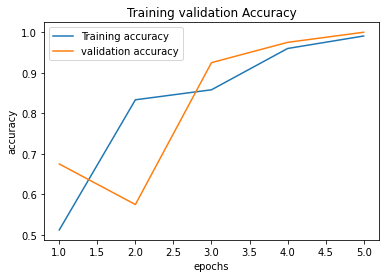

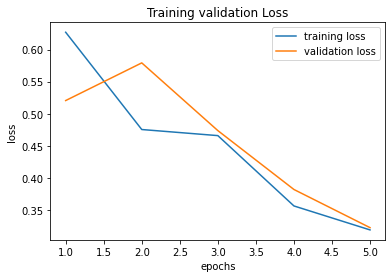

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='validation accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training validation Accuracy')
plt.show()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training validation Loss')
plt.show()

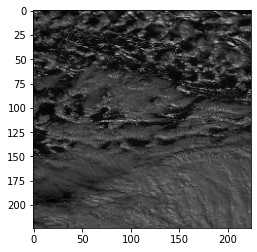

In [ ]:
import cv2
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ML4CV lab4/split_data/test/smoke/1118.jpeg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
img = img/255.0
plt.imshow(img)

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
input_img = img.reshape(1,224,224,3)
input_img.shape

(1, 224, 224, 3)

In [ ]:
output = cnn_model.predict(input_img)

In [ ]:
output

array([[0.4267168, 0.5732832]], dtype=float32)

In [ ]:
import numpy as np
out = np.argmax(output)
out

1

In [ ]:
#1 means smoke
#0 means non smoke

In [ ]:
print(test_data.class_indices)

{'non-smoke': 0, 'smoke': 1}


In [ ]:
cnn_model.save('model.h5')

In [ ]:
new_model = keras.model.load_model('model.h5')

AttributeError: ignored

In [ ]:
new_model.evaluate(test_data)

NameError: ignored